In [1]:
from utils import *

/proj/rep-learning-robotics/users/x_nonra/.conda_envs/hubert/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
root_dir = "/proj/rep-learning-robotics/users/x_nonra/HuBERT-ECG/data/physionet.org/files/ptb-xl/1.0.3/records500"
output_dir = "/proj/rep-learning-robotics/users/x_nonra/HuBERT-ECG/data/ptb-xl"
prep_ptbxl_files(root_folder=root_dir, output_folder=output_dir,)

recorde_name =  17966_hr
recorde_name =  17336_hr
recorde_name =  17588_hr
recorde_name =  17981_hr
recorde_name =  17598_hr
recorde_name =  17614_hr
recorde_name =  17315_hr
recorde_name =  17608_hr
recorde_name =  17522_hr
recorde_name =  17813_hr
recorde_name =  17382_hr
recorde_name =  17581_hr
recorde_name =  17019_hr
recorde_name =  17912_hr
recorde_name =  17538_hr
recorde_name =  17943_hr
recorde_name =  17723_hr
recorde_name =  17634_hr
recorde_name =  17119_hr
recorde_name =  17320_hr
recorde_name =  17772_hr
recorde_name =  17353_hr
recorde_name =  17535_hr
recorde_name =  17991_hr
recorde_name =  17863_hr
recorde_name =  17381_hr
recorde_name =  17501_hr
recorde_name =  17136_hr
recorde_name =  17354_hr
recorde_name =  17226_hr
recorde_name =  17247_hr
recorde_name =  17670_hr
recorde_name =  17709_hr
recorde_name =  17139_hr
recorde_name =  17685_hr
recorde_name =  17801_hr
recorde_name =  17803_hr
recorde_name =  17988_hr
recorde_name =  17534_hr
recorde_name =  17971_hr


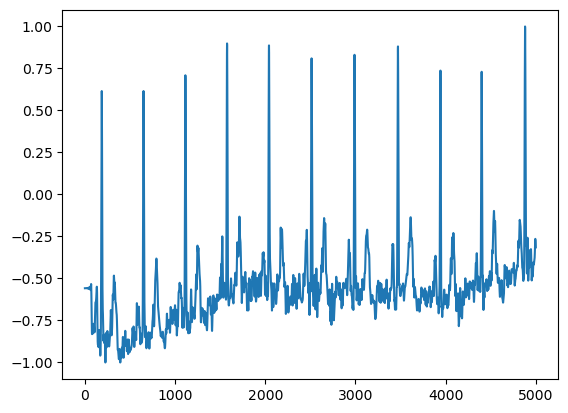

In [4]:
import matplotlib.pyplot as plt
import numpy as np

sample_ecg = np.load("/proj/rep-learning-robotics/users/x_nonra/HuBERT-ECG/data/ptb-xl/HR00001.hea.npy")
plt.plot(sample_ecg[0, :])
plt.show()

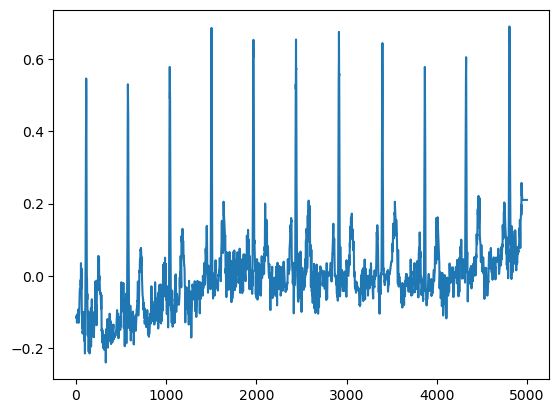

In [5]:
record = wfdb.rdrecord("/proj/rep-learning-robotics/users/x_nonra/HuBERT-ECG/data/physionet.org/files/ptb-xl/1.0.3/records500/00000/00001_hr")
signal = record.p_signal  # shape: (samples, leads)
signal = signal.T  # shape: (leads, samples)
plt.plot(signal[0, :])
plt.show()

In [6]:
from transformers import AutoModel
import torch

size = "small"  # or "base", "large"

# Load the model (automatically detects .safetensors if available)
model = AutoModel.from_pretrained(f"Edoardo-BS/hubert-ecg-{size}", trust_remote_code=True)

# Save the weights as a standard PyTorch .pt file (state_dict only)
torch.save(model.state_dict(), "model_weights.pt")


/proj/rep-learning-robotics/users/x_nonra/.conda_envs/hubert/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
A new version of the following files was downloaded from https://huggingface.co/Edoardo-BS/hubert-ecg-small:
- hubert_ecg.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


In [ ]:
model_config = {
  "activation_dropout": 0.1,
  "apply_spec_augment": true,
  "architectures": [
    "HuBERTECG"
  ],
  "attention_dropout": 0.1,
  "auto_map": {
    "AutoConfig": "hubert_ecg.HuBERTECGConfig",
    "AutoModel": "hubert_ecg.HuBERTECG"
  },
  "bos_token_id": 1,
  "classifier_proj_size": 256,
  "conv_bias": false,
  "conv_dim": [
    512,
    512,
    512,
    512,
    512
  ],
  "conv_kernel": [
    10,
    3,
    3,
    2,
    2
  ],
  "conv_stride": [
    4,
    2,
    2,
    2,
    2
  ],
  "ctc_loss_reduction": "sum",
  "ctc_zero_infinity": false,
  "do_stable_layer_norm": false,
  "ensemble_length": 1,
  "eos_token_id": 2,
  "feat_extract_activation": "gelu",
  "feat_extract_norm": "group",
  "feat_proj_dropout": 0.0,
  "feat_proj_layer_norm": true,
  "final_dropout": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout": 0.1,
  "hidden_size": 512,
  "initializer_range": 0.02,
  "intermediate_size": 2048,
  "layer_norm_eps": 1e-05,
  "layerdrop": 0.1,
  "mask_feature_length": 10,
  "mask_feature_min_masks": 0,
  "mask_feature_prob": 0.0,
  "mask_time_length": 1,
  "mask_time_min_masks": 2,
  "mask_time_prob": 0.33,
  "model_type": "hubert_ecg",
  "num_attention_heads": 8,
  "num_conv_pos_embedding_groups": 16,
  "num_conv_pos_embeddings": 128,
  "num_feat_extract_layers": 5,
  "num_hidden_layers": 8,
  "pad_token_id": 0,
  "torch_dtype": "float32",
  "transformers_version": "4.38.1",
  "use_weighted_layer_sum": false,
  "vocab_size": 32,
  "vocab_sizes": [
    500
  ]
}